# Helper notebook to label de landmarks on the KERG dataset

### Import librairies

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from utils.load_config import load_config
from utils.load_data import load_data

np.random.seed(0)
np.set_printoptions(precision=3, suppress=True, linewidth=180)

### load data

In [7]:
# define configuration
config_path = 'NR_02_FERG_m0001.json'

# load config
config = load_config(config_path, path='../configs/norm_reference')

In [8]:
### Load training data
train_data = load_data(config)
print("shape train_data[0]", np.shape(train_data[0]))

100%|██████████| 2000/2000 [00:04<00:00, 455.75it/s]


shape train_data[0] (2000, 224, 224, 3)


In [9]:
def display_image(image, lmks=None, ref_lmks=None, lmk_size=5, pre_processing=None, figure=None):
    img = np.copy(image)

    if pre_processing == 'VGG19':
        # (un-)process image from VGG19 pre-processing
        img = np.array(img + 128) / 256
        img = img[..., ::-1]  # rgb
        img[img > 1] = 1.0

    # compute padding
    lmk_padding = int(lmk_size/2)

    if ref_lmks is not None:
        # add lmk on image
        ref_lmks = np.array(ref_lmks).astype(int)
        for r_lmk in ref_lmks:
            img[r_lmk[1]-lmk_padding:r_lmk[1]+lmk_padding, r_lmk[0]-lmk_padding:r_lmk[0]+lmk_padding] = [0, 1, 0]

    if lmks is not None:
        # add lmk on image
        lmks = np.array(lmks).astype(int)
        for lmk in lmks:
            img[lmk[1]-lmk_padding:lmk[1]+lmk_padding, lmk[0]-lmk_padding:lmk[0]+lmk_padding] = [0, 1, 1]

    if figure is None:
        plt.figure()
        plt.imshow(img)
    else:
        figure.imshow(img)

In [10]:
def display_images(images, lmks=None, ref_lmks=None, n_max_col=7, size_img=4, lmk_size=5, pre_processing=None):
    n_image = len(images)

    # compute n_row and n_column
    n_col = np.min([n_max_col, n_image])
    n_row = int(n_image / n_col)

    # declare figure
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figheight(n_row*size_img)
    fig.set_figwidth(n_col*size_img)

    lmk_pos = None

    for i in range(n_row):
        for j in range(n_col):
            img_idx = i * n_col + j

            if lmks is not None:
                lmk_pos = lmks[img_idx]

            if n_row == 1 and n_col == 1:
                display_image(images[img_idx], lmks=lmk_pos, ref_lmks=ref_lmks, lmk_size=lmk_size, pre_processing=pre_processing, figure=axs)
            elif n_row == 1:
                display_image(images[img_idx], lmks=lmk_pos, ref_lmks=ref_lmks, lmk_size=lmk_size, pre_processing=pre_processing, figure=axs[img_idx])
            else:
                display_image(images[img_idx], lmks=lmk_pos, ref_lmks=ref_lmks, lmk_size=lmk_size, pre_processing=pre_processing, figure=axs[i, j])

Labeled images

| Avatar   |                              Ray |                            Bonnie |   Jules |  Malcolm |           Aia |     Mery |
|:---------|---------------------------------:|----------------------------------:|--------:|---------:|--------------:|---------:|
| Neutral  |     21, 37, 49, 73, 84, 145, 148 |      6, 12, 24, 29, 106, 177, 192 | 20, 163 |  77, 135 |    13, 25, 45 |   10, 42 |
| Happy    | 43, 124, 166, 212, 294, 328, 504 |  30, 182, 340, 352, 357, 362, 383 |   3, 98 |   68, 96 |        50, 61 |   40, 83 |
| Angry    |     38, 67, 76, 89, 99, 123, 151 |       2, 4, 44, 85, 107, 109, 181 | 81, 100 |  65, 136 |        54, 66 |  23, 287 |
| Sad      |   15, 22, 47, 146, 227, 420, 468 | 126, 159, 178, 200, 206, 207, 246 |  17, 35 |   39, 53 |        36, 56 |  31, 203 |
| Surprise | 55, 130, 139, 160, 189, 219, 248 |    34, 59, 97, 129, 157, 165, 197 |  14, 27 | 125, 138 |        48, 70 |  79, 121 |
| Fear     |       1, 8, 51, 62, 72, 105, 164 |    7, 16, 127, 175, 179, 282, 285 |  52, 74 |    5, 28 | 9, 11, 18, 46 |  91, 261 |
| Disgust  |      0, 26, 71, 75, 92, 142, 147 |        19, 32, 33, 41, 58, 64, 69 | 80, 114 |  90, 180 |        60, 94 | 270, 461 |

label: 3
len lmk_pos 147
idx: 246


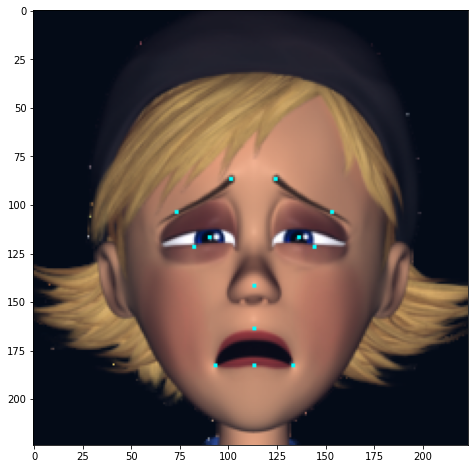

In [105]:
# create labeling
# Bonnie -> start at 97
img_idx = 246
print("label:", int(train_data[1][img_idx]))

# l_eye, r_eye, nose, l_eyebrow_ext, l_eyebrow_int, r_eyebrow_int, r_eyebrow_ext,
# l_corner_mouth, up_mouth, r_corner_mouth, lower_mouth,
# l_lower_eyelid, r_lower_eyelid

# [x, y] -> [horizontal, vertical]
lmk_pos = {0: [[[85, 112], [142, 112], [114, 144], [74, 94], [102, 101], [125, 100], [155, 94], [90, 169], [114, 160], [136, 167], [115, 175], [83, 113], [143, 114]]],  # 0 Ray
           1: [[[86, 114], [142, 114], [114, 148], [67, 89], [100, 80], [128, 80], [160, 89], [86, 184], [114, 165], [140, 184], [114, 193], [82, 124], [145, 124]]],  # 1 Ray
           2: [[[91, 117], [137, 117], [114, 142], [70, 101], [100, 112], [130, 112], [160, 101], [95, 167], [114, 161], [131, 167], [114, 170], [83, 128], [145, 128]]],  # Bonnie
           3: [[[88, 103], [139, 103], [114, 139], [74, 74], [99, 75], [128, 75], [154, 74], [85, 154], [114, 154], [145, 151], [114, 174], [84, 110], [142, 110]]],  # 3 Jules
           4: [[[91, 117], [137, 117], [114, 142], [70, 99], [101, 110], [127, 110], [159, 99], [95, 174], [114, 163], [132, 174], [114, 175], [83, 128], [145, 128]]],  # 4 Bonnie
           5: [[[97, 95], [130, 95], [114, 118], [88, 71], [105, 70], [123, 70], [140, 73], [86, 164], [113, 143], [140, 164], [114, 170], [95, 100], [134, 100]]],  # 5 Malcolm
           6: [[[91, 117], [137, 117], [114, 142], [74, 91], [101, 94], [125, 94], [154, 91], [98, 170], [114, 164], [132, 170], [114, 176], [83, 128], [145, 128]]],  # 6 Bonnie
           7: [[[91, 117], [137, 117], [114, 142], [74, 93], [102, 84], [125, 85], [154, 95], [87, 184], [114, 162], [142, 184], [114, 190], [83, 126], [145, 126]]],  # 7 Bonnie
           8: [[[86, 114], [142, 114], [114, 147], [70, 84], [98, 78], [130, 78], [155, 84], [84, 180], [114, 163], [142, 180], [114, 186], [84, 122], [145, 122]]],  # 8 Ray
           9: [[[84, 109], [147, 109], [112, 152], [60, 82], [98, 72], [126, 72], [164, 82], [83, 185], [112, 171], [140, 186], [112, 188], [74, 130], [150, 130]]],  # 9 Aia
           10: [[[88, 132], [142, 132], [116, 159], [70, 105], [101, 108], [129, 108], [160, 105], [98, 178], [116, 174], [134, 177], [116, 183], [81, 138], [150, 138]]],  # Mery
           11: [[[81, 113], [143, 113], [112, 152], [60, 80], [98, 72], [126, 72], [164, 80], [84, 193], [112, 169], [139, 193], [112, 198], [74, 128], [150, 128]]],  # 11 Aia
           12: [[[91, 117], [137, 117], [114, 142], [70, 93], [98, 92], [130, 92], [155, 92], [95, 168], [114, 162], [132, 168], [114, 172], [84, 127], [145, 127]]],  # 12 Bonnie
           13: [[[81, 113], [144, 113], [112, 152], [57, 86], [96, 88], [128, 89], [164, 84], [89, 172], [112, 167], [137, 171], [112, 181], [74, 127], [150, 127]]],  # 13 Aia
           14: [[[88, 103], [138, 103], [114, 139], [74, 70], [99, 71], [128, 71], [155, 71], [97, 172], [114, 158], [130, 172], [114, 190], [84, 113], [142, 113]]],  # 14 Jules
           15: [[[86, 114], [142, 114], [114, 144], [67, 93], [100, 84], [128, 84], [160, 93], [89, 178], [114, 165], [137, 178], [114, 174], [84, 119], [144, 119]]],  # 15 Ray
           16: [[[92, 118], [137, 118], [114, 142], [74, 92], [102, 84], [126, 86], [154, 93], [87, 186], [114, 163], [141, 185], [114, 199], [83, 126], [145, 126]]], # 16 Bonnie
           17: [[[88, 103], [138, 103], [114, 139], [74, 95], [101, 83], [125, 83], [155, 96], [94, 165], [114, 156], [132, 165], [114, 164], [85, 107], [141, 107]]],  # 17 Jules
           18: [[[81, 113], [144, 113], [112, 152], [57, 81], [97, 72], [128, 72], [164, 81], [79, 190], [112, 166], [143, 190], [112, 201], [74, 126], [150, 126]]],  # 18 Aia
           19: [[[91, 117], [137, 117], [114, 142], [74, 92], [100, 96], [129, 88], [154, 82], [92, 175], [114, 153], [135, 175], [114, 187], [83, 118], [145, 119]]],  # 19 Bonnie
           20: [[[88, 103], [138, 103], [114, 139], [74, 81], [99, 81], [128, 81], [155, 80], [95, 160], [114, 156], [132, 160], [114, 165], [84, 112], [142, 112]]],  # 20 Jules
           21: [[[86, 114], [142, 114], [114, 147], [70, 89], [98, 90], [130, 90], [155, 88], [90, 172], [114, 168], [137, 171], [114, 180], [84, 123], [145, 123]]],  # 21 Ray
           22: [[[86, 114], [142, 114], [114, 147], [70, 100], [101, 88], [126, 87], [155, 100], [91, 178], [114, 166], [136, 176], [114, 178], [84, 120], [145, 120]]],  # 22 Ray
           23: [[[88, 132], [142, 132], [116, 159], [70, 116], [101, 130], [129, 130], [160, 116], [99, 178], [116, 173], [134, 177], [116, 183], [81, 143], [150, 142]]],  # Mery
           24: [[[91, 117], [137, 117], [114, 146], [73, 94], [100, 95], [129, 95], [154, 94], [92, 166], [114, 160], [135, 166], [114, 171], [83, 127], [145, 127]]],  # 24 Bonnie
           25: [[[81, 113], [144, 113], [112, 152], [57, 84], [96, 88], [128, 88], [164, 83], [89, 172], [112, 167], [137, 171], [112, 180], [74, 127], [150, 127]]],  # 25 Aia
           26: [[[85, 112], [142, 112], [114, 144], [74, 96], [102, 101], [125, 99], [155, 93], [90, 166], [114, 158], [135, 165], [115, 170], [83, 113], [143, 114]]],  # 26 Ray
           27: [[[88, 103], [138, 103], [114, 139], [74, 74], [99, 73], [128, 73], [155, 74], [98, 170], [114, 156], [129, 170], [114, 191], [84, 113], [142, 113]]],  # 27 Jules
           28: [[[97, 95], [130, 95], [114, 118], [88, 69], [105, 65], [123, 65], [140, 70], [87, 164], [113, 142], [139, 164], [114, 170], [94, 103], [135, 103]]],  # 28 Malcolm
           29: [[[91, 117], [137, 117], [114, 142], [74, 91], [101, 94], [124, 94], [154, 91], [98, 170], [114, 164], [132, 170], [114, 176], [83, 128], [145, 128]]],  # 29 Bonnie
           30: [[[91, 117], [137, 117], [114, 142], [74, 91], [99, 92], [128, 92], [154, 91], [78, 159], [114, 156], [150, 158], [114, 186], [83, 118], [145, 118]]],  # 30 Bonnie
           31: [[[88, 132], [142, 132], [116, 159], [70, 116], [101, 107], [129, 107], [160, 116], [96, 184], [116, 173], [134, 184], [116, 183], [81, 138], [150, 138]]],  # Mery
           32: [[[91, 117], [137, 117], [114, 142], [74, 92], [100, 97], [128, 96], [154, 91], [92, 167], [114, 156], [136, 165], [114, 170], [83, 118], [145, 119]]],  # 32 Bonnie
           33: [[[91, 117], [137, 117], [114, 142], [75, 88], [100, 95], [128, 97], [154, 91], [91, 176], [114, 156], [135, 176], [114, 185], [83, 118], [145, 119]]],  # 33 Bonnie
           34: [[[91, 117], [137, 117], [114, 142], [75, 74], [100, 78], [128, 78], [154, 78], [96, 178], [114, 163], [131, 178], [114, 189], [83, 130], [145, 130]]],  # 34 Bonnie
           35: [[[88, 103], [138, 103], [114, 136], [74, 96], [101, 84], [125, 85], [155, 98], [92, 160], [114, 150], [134, 160], [114, 159], [85, 109], [141, 109]]],  # 35 Jules
           36: [[[80, 114], [145, 114], [112, 147], [60, 92], [98, 76], [126, 76], [164, 92], [88, 179], [112, 167], [135, 179], [112, 182], [74, 121], [150, 121]]],  # 36 Aia
           37: [[[86, 114], [142, 114], [114, 147], [70, 91], [98, 91], [130, 90], [155, 90], [90, 172], [114, 168], [137, 171], [114, 180], [84, 123], [145, 123]]],  # 37 Ray
           38: [[[86, 114], [142, 114], [114, 147], [67, 93], [100, 108], [127, 108], [160, 93], [91, 171], [114, 164], [135, 171], [114, 174], [84, 125], [144, 125]]],  # 38 Ray
           39: [[[97, 94], [130, 94], [114, 120], [88, 80], [103, 75], [126, 75], [140, 80], [95, 158], [113, 149], [131, 158], [114, 160], [92, 98], [136, 98]]],  # 39 Malcom
           40: [[[88, 132], [142, 132], [116, 159], [70, 106], [100, 108], [129, 107], [160, 104], [88, 169], [116, 171], [138, 170], [116, 186], [81, 137], [150, 137]]],  # Mery
           41: [[[91, 117], [137, 115], [114, 142], [75, 85], [100, 94], [126, 96], [154, 91], [89, 174], [114, 157], [137, 175], [114, 185], [83, 119], [145, 117]]],  # 41 Bonnie
           42: [[[88, 132], [142, 132], [116, 159], [70, 107], [101, 110], [129, 110], [160, 107], [96, 178], [116, 174], [134, 177], [116, 183], [81, 140], [150, 140]]],  # Mery
           43: [[[86, 114], [142, 114], [114, 146], [70, 91], [99, 91], [129, 91], [155, 90], [86, 160], [114, 159], [143, 158], [114, 175], [84, 119], [145, 117]]],  # 43 Ray
           44: [[[91, 117], [137, 117], [114, 142], [70, 107], [101, 114], [127, 114], [159, 107], [95, 172], [114, 162], [133, 172], [114, 177], [83, 124], [145, 124]]],  # Bonnie
           45: [[[81, 113], [144, 113], [112, 152], [57, 84], [96, 84], [128, 84], [164, 83], [89, 172], [112, 167], [137, 171], [112, 181], [74, 127], [150, 127]]],  # 45 Aia
           46: [[[81, 113], [144, 113], [112, 152], [57, 81], [97, 69], [126, 69], [165, 80], [85, 200], [112, 169], [138, 200], [112, 212], [74, 133], [150, 133]]],  # 46 Aia
           47: [[[86, 114], [142, 114], [114, 147], [70, 100], [101, 90], [126, 90], [155, 98], [91, 174], [114, 165], [136, 174], [114, 175], [84, 117], [145, 117]]],  # 47 Ray
           48: [[[81, 113], [144, 113], [112, 152], [57, 81], [97, 79], [126, 79], [165, 80], [87, 177], [112, 166], [137, 177], [112, 205], [74, 130], [150, 130]]],  # 48 Aia
           49: [[[86, 114], [142, 114], [114, 147], [72, 91], [96, 91], [130, 90], [155, 90], [95, 170], [114, 165], [135, 169], [114, 178], [84, 123], [145, 123]]],  # 49 Ray
           50: [[[81, 113], [144, 113], [112, 152], [57, 84], [96, 84], [128, 84], [164, 83], [85, 167], [112, 165], [139, 166], [112, 185], [74, 117], [150, 118]]],  # 50 Aia
           51: [[[86, 114], [142, 114], [114, 147], [70, 88], [98, 79], [130, 79], [155, 88], [85, 180], [114, 163], [142, 180], [114, 190], [84, 122], [145, 122]]],  # Ray
           52: [[[88, 103], [138, 103], [113, 137], [74, 77], [99, 70], [125, 70], [155, 78], [86, 171], [113, 154], [137, 170], [113, 178], [84, 112], [142, 112]]],  # 52 Jules
           53: [[[97, 94], [130, 94], [114, 120], [88, 80], [103, 75], [126, 75], [140, 80], [95, 158], [113, 149], [131, 158], [114, 160], [92, 98], [136, 98]]],  # Malcolm
           54: [[[81, 113], [144, 113], [112, 152], [57, 103], [96, 114], [128, 114], [164, 103], [88, 173], [112, 166], [136, 173], [112, 180], [74, 126], [150, 126]]],  # 54 Aia
           55: [[[86, 114], [142, 114], [114, 147], [70, 86], [98, 81], [130, 81], [155, 84], [91, 188], [114, 172], [136, 188], [114, 209], [84, 126], [145, 126]]],  # 55 Ray
           56: [[[80, 110], [145, 110], [112, 147], [60, 100], [98, 82], [126, 82], [164, 100], [87, 184], [112, 167], [135, 182], [112, 181], [74, 113], [150, 113]]],  # Aia
           59: [[[91, 117], [137, 117], [114, 142], [72, 85], [100, 87], [128, 87], [156, 85], [98, 184], [114, 164], [129, 184], [114, 202], [83, 130], [145, 130]]],  # Bonnie
           60: [[[81, 113], [144, 113], [112, 148], [57, 86], [96, 91], [128, 91], [164, 86], [89, 167], [112, 160], [135, 168], [114, 179], [74, 114], [150, 113]]],  # 60 Aia
           61: [[[81, 113], [144, 113], [112, 152], [57, 83], [96, 82], [128, 82], [164, 82], [82, 166], [112, 165], [142, 165], [112, 182], [74, 121], [150, 121]]],  # Aia
           62: [[[86, 114], [142, 114], [114, 147], [70, 82], [98, 72], [128, 71], [154, 81], [85, 182], [114, 164], [143, 182], [114, 190], [84, 126], [145, 126]]],  # Ray
           65: [[[97, 94], [130, 94], [114, 120], [88, 80], [103, 88], [126, 88], [140, 80], [96, 152], [114, 147], [131, 152], [114, 156], [92, 103], [136, 103]]],  # 65 Malcolm
           66: [[[81, 113], [144, 113], [112, 152], [57, 90], [96, 112], [128, 112], [164, 91], [89, 170], [112, 163], [135, 170], [112, 174], [74, 129], [150, 128]]],   # Aia
           67: [[[86, 114], [142, 114], [114, 147], [67, 87], [105, 109], [124, 109], [156, 87], [86, 183], [114, 158], [138, 181], [114, 194], [84, 119], [144, 119]]],  # Ray
           68: [[[97, 94], [130, 94], [114, 120], [86, 71], [100, 72], [128, 71], [142, 70], [87, 142], [114, 144], [140, 141], [114, 154], [92, 96], [136, 96]]],  # 68 Malcolm
           70: [[[81, 113], [144, 113], [112, 152], [57, 81], [97, 80], [126, 80], [165, 80], [97, 181], [112, 173], [127, 181], [112, 198], [74, 130], [150, 130]]],  # Aia
           71: [[[85, 112], [142, 112], [114, 144], [74, 96], [101, 101], [126, 99], [155, 93], [90, 166], [114, 157], [135, 165], [115, 170], [83, 113], [143, 114]]],  # Ray
           72: [[[86, 114], [142, 114], [114, 147], [70, 80], [98, 74], [128, 74], [154, 79], [86, 187], [114, 164], [142, 187], [114, 201], [84, 125], [145, 125]]],  # Ray
           73: [[[86, 114], [142, 114], [114, 147], [72, 91], [99, 91], [128, 90], [155, 90], [94, 168], [114, 165], [135, 168], [114, 178], [84, 123], [145, 123]]],  # Ray
           74: [[[88, 103], [138, 103], [113, 137], [74, 76], [99, 68], [125, 68], [155, 77], [86, 177], [113, 154], [135, 177], [113, 184], [84, 112], [142, 112]]],  # Jules
           75: [[[85, 112], [142, 112], [114, 142], [74, 90], [101, 98], [126, 99], [155, 93], [88, 173], [114, 159], [138, 170], [115, 181], [83, 113], [143, 114]]],  # Ray
           76: [[[86, 114], [142, 114], [114, 147], [67, 87], [103, 109], [122, 109], [156, 87], [87, 182], [114, 158], [138, 181], [114, 194], [84, 119], [144, 119]]],  # Ray
           77: [[[97, 94], [130, 94], [114, 123], [86, 72], [100, 72], [129, 72], [143, 72], [93, 151], [114, 147], [136, 151], [114, 158], [92, 101], [136, 101]]],  # 77 Malcolm
           79: [[[88, 132], [142, 132], [116, 157], [70, 100], [100, 97], [129, 97], [160, 100], [92, 183], [116, 170], [136, 183], [116, 206], [81, 140], [150, 140]]],  # 79 Mery
           80: [[[88, 103], [138, 103], [114, 132], [74, 81], [101, 85], [127, 90], [155, 84], [90, 159], [114, 150], [134, 159], [114, 170], [85, 105], [141, 105]]],  # 80 Jules
           81: [[[88, 103], [138, 103], [114, 138], [74, 88], [100, 104], [128, 103], [155, 86], [89, 172], [114, 150], [137, 172], [114, 180], [85, 110], [141, 110]]],  # 81 Jules
           83: [[[88, 132], [142, 132], [116, 159], [70, 108], [100, 110], [129, 110], [160, 106], [88, 169], [116, 169], [140, 170], [116, 185], [81, 136], [150, 136]]],
           84: [[[86, 114], [142, 114], [114, 147], [72, 91], [99, 91], [128, 90], [155, 90], [94, 168], [114, 165], [135, 168], [114, 178], [84, 123], [145, 123]]],  # Ray
           85: [[[91, 117], [137, 117], [114, 142], [70, 107], [101, 114], [127, 114], [159, 107], [95, 168], [114, 162], [133, 168], [114, 172], [83, 124], [145, 124]]], # Bonnie
           89: [[[86, 114], [142, 114], [114, 147], [67, 92], [101, 107], [124, 107], [156, 93], [90, 172], [114, 164], [136, 172], [114, 179], [84, 123], [144, 123]]],  # Ray
           90: [[[97, 94], [130, 94], [114, 123], [86, 74], [103, 76], [126, 76], [143, 72], [94, 159], [114, 141], [136, 151], [114, 164], [92, 93], [136, 94]]],  # 90 Malcolm
           91: [[[88, 132], [142, 132], [116, 157], [70, 111], [100, 105], [129, 105], [160, 112], [91, 186], [116, 173], [138, 186], [115, 193], [81, 139], [150, 139]]], # 91 Mery
           92: [[[85, 112], [142, 112], [114, 142], [74, 90], [101, 98], [126, 99], [155, 94], [87, 174], [114, 161], [140, 170], [114, 188], [83, 115], [143, 114]]],  # Ray
           94: [[[81, 113], [144, 111], [112, 148], [57, 82], [96, 89], [128, 94], [164, 85], [89, 170], [112, 160], [138, 168], [117, 189], [74, 114], [150, 111]]],
           96: [[[97, 94], [130, 94], [114, 120], [86, 71], [100, 72], [128, 71], [142, 70], [86, 139], [114, 140], [142, 139], [114, 165], [92, 96], [136, 96]]],  # Malcolm
           98: [[[88, 103], [139, 103], [114, 137], [74, 74], [99, 74], [128, 74], [154, 75], [87, 151], [114, 152], [141, 151], [114, 162], [84, 108], [142, 108]]],  # Jules
           99: [[[86, 114], [142, 114], [114, 147], [67, 100], [101, 111], [124, 110], [156, 100], [90, 170], [114, 163], [136, 170], [114, 175], [84, 122], [144, 122]]],  # Ray
           100: [[[88, 103], [138, 103], [114, 140], [74, 89], [98, 99], [128, 99], [155, 86], [93, 164], [114, 157], [134, 164], [114, 167], [85, 114], [141, 113]]],  # Jules
           105: [[[86, 114], [142, 114], [114, 147], [70, 76], [98, 70], [128, 70], [154, 76], [86, 187], [114, 162], [142, 187], [114, 204], [84, 126], [145, 125]]],  # Ray
           106: [[[91, 117], [137, 117], [114, 142], [74, 91], [101, 94], [124, 94], [154, 91], [97, 170], [114, 163], [132, 170], [114, 177], [83, 127], [145, 127]]],  # Bonnie
           107: [[[91, 117], [137, 117], [114, 142], [70, 108], [101, 115], [127, 115], [159, 108], [92, 172], [114, 162], [136, 172], [114, 177], [83, 124], [145, 124]]], # Bonnie
           109: [[[91, 117], [137, 117], [114, 142], [70, 104], [101, 115], [127, 115], [159, 104], [92, 176], [114, 161], [136, 176], [114, 186], [83, 124], [145, 124]]], # Bonnie
           114: [[[88, 101], [138, 103], [114, 132], [74, 87], [101, 92], [127, 89], [155, 83], [87, 154], [114, 150], [130, 165], [103, 177], [85, 102], [141, 105]]],  # Jules
           121: [[[88, 132], [142, 132], [116, 157], [70, 100], [100, 94], [129, 95], [160, 100], [100, 183], [116, 177], [130, 183], [116, 189], [81, 139], [150, 139]]],
           123: [[[86, 114], [142, 114], [114, 147], [67, 103], [101, 111], [125, 110], [156, 105], [90, 170], [114, 163], [136, 170], [114, 175], [84, 123], [144, 123]]],  # Ray
           124: [[[86, 114], [142, 114], [114, 146], [70, 91], [99, 91], [129, 91], [155, 90], [83, 161], [114, 159], [144, 161], [114, 182], [84, 118], [145, 118]]],   # 124 Ray
           125: [[[97, 94], [130, 94], [114, 123], [86, 71], [100, 72], [129, 72], [143, 71], [88, 156], [114, 147], [136, 158], [114, 180], [92, 102], [136, 104]]],  # 125 Malcolm
           126: [[[91, 117], [137, 117], [114, 142], [74, 99], [101, 89], [124, 88], [154, 99], [92, 175], [114, 162], [136, 175], [114, 175], [83, 124], [145, 124]]],  # Bonnie
           130: [[[86, 114], [142, 114], [114, 147], [70, 81], [98, 80], [130, 80], [155, 81], [89, 175], [114, 165], [138, 175], [114, 207], [84, 124], [145, 124]]],  # Ray
           135: [[[97, 94], [130, 94], [114, 123], [86, 76], [100, 76], [129, 76], [143, 76], [93, 146], [114, 145], [136, 146], [114, 153], [92, 99], [136, 99]]],  # Malcolm
           136: [[[97, 94], [130, 94], [114, 120], [88, 84], [106, 94], [123, 94], [142, 82], [98, 164], [114, 145], [131, 162], [114, 176], [92, 98], [136, 98]]],  # Malcolm
           138: [[[97, 94], [130, 94], [114, 123], [86, 69], [100, 69], [129, 69], [143, 69], [92, 156], [114, 147], [136, 156], [114, 174], [92, 102], [136, 103]]],  # Malcolm
           139: [[[86, 114], [142, 114], [114, 147], [70, 88], [98, 84], [130, 84], [155, 86], [98, 180], [114, 170], [130, 180], [114, 207], [84, 125], [145, 125]]],  # Ray
           142: [[[85, 112], [142, 112], [114, 142], [74, 91], [101, 97], [126, 94], [155, 85], [88, 170], [114, 159], [136, 172], [114, 188], [83, 113], [143, 114]]],  # Ray
           145: [[[86, 114], [142, 114], [114, 147], [72, 91], [99, 91], [128, 90], [155, 91], [95, 168], [114, 165], [135, 166], [114, 178], [84, 123], [145, 123]]],  # Ray
           146: [[[86, 114], [142, 114], [114, 147], [70, 100], [100, 88], [126, 88], [155, 98], [92, 176], [114, 165], [136, 176], [114, 177], [84, 119], [145, 119]]],  # Ray
           147: [[[85, 112], [142, 112], [114, 142], [74, 88], [101, 97], [126, 97], [155, 90], [90, 175], [114, 159], [138, 180], [114, 188], [83, 113], [143, 110]]],  # Ray
           148: [[[86, 114], [142, 114], [114, 147], [72, 89], [99, 89], [128, 89], [155, 88], [92, 166], [114, 163], [135, 166], [113, 176], [84, 122], [145, 122]]],  # Ray
           151: [[[86, 114], [142, 114], [114, 147], [67, 93], [101, 106], [125, 106], [156, 95], [92, 176], [114, 166], [134, 177], [114, 178], [84, 124], [144, 125]]],  # Ray
           159: [[[91, 117], [137, 117], [114, 142], [74, 105], [102, 90], [124, 88], [154, 105], [94, 183], [114, 162], [134, 183], [114, 182], [83, 122], [145, 122]]],  # Bonnie
           160: [[[86, 114], [142, 114], [114, 147], [70, 83], [98, 81], [130, 81], [155, 82], [88, 174], [114, 164], [139, 173], [114, 204], [84, 124], [145, 124]]],  # Ray
           163: [[[88, 103], [138, 103], [114, 139], [74, 81], [99, 81], [128, 81], [155, 80], [93, 160], [114, 156], [134, 160], [114, 166], [84, 112], [142, 112]]],  # Jules
           164: [[[86, 114], [142, 114], [114, 147], [70, 84], [98, 77], [128, 78], [154, 84], [85, 180], [114, 161], [143, 180], [114, 191], [84, 123], [145, 123]]],  # Ray
           166: [[[86, 114], [142, 114], [114, 146], [70, 84], [99, 85], [129, 87], [155, 88], [85, 163], [114, 161], [144, 159], [114, 189], [84, 120], [145, 119]]],  # Ray
           177: [[[91, 117], [137, 117], [114, 142], [74, 91], [101, 94], [126, 94], [154, 91], [94, 170], [114, 163], [134, 170], [114, 175], [83, 129], [145, 129]]],  # Bonnie
           178: [[[91, 117], [137, 117], [114, 142], [74, 95], [102, 82], [124, 82], [154, 95], [96, 171], [114, 160], [132, 171], [114, 174], [83, 123], [145, 123]]],  # Bonnie
           180: [[[97, 92], [130, 92], [114, 123], [86, 72], [103, 75], [126, 76], [143, 72], [90, 150], [114, 141], [137, 151], [113, 166], [92, 93], [136, 94]]],  # Malcolm
           181: [[[91, 117], [137, 117], [114, 142], [70, 100], [101, 111], [127, 111], [159, 100], [93, 175], [114, 161], [135, 175], [114, 175], [83, 129], [145, 129]]], # Bonnie
           182: [[[91, 117], [137, 117], [114, 142], [74, 88], [99, 89], [128, 89], [154, 88], [80, 159], [114, 156], [148, 158], [114, 183], [83, 120], [145, 120]]],  # Bonnie
           189: [[[86, 114], [142, 114], [114, 147], [70, 82], [98, 80], [130, 80], [155, 80], [97, 186], [114, 171], [130, 186], [114, 210], [84, 126], [145, 126]]],  # Ray
           192: [[[91, 117], [137, 117], [114, 142], [74, 93], [101, 95], [127, 95], [154, 93], [93, 167], [114, 161], [135, 167], [114, 173], [83, 130], [145, 130]]],  # Bonnie
           195: [[[91, 117], [137, 117], [114, 142], [70, 96], [101, 111], [127, 111], [159, 96], [89, 172], [114, 161], [138, 172], [114, 180], [83, 125], [145, 125]]], # Bonnie
           200: [[[91, 117], [137, 117], [114, 142], [74, 97], [102, 82], [124, 82], [154, 97], [95, 177], [114, 161], [133, 177], [114, 178], [83, 121], [145, 121]]],  # Bonnie
           203: [[[88, 132], [142, 132], [116, 159], [70, 121], [101, 114], [129, 114], [160, 121], [95, 179], [116, 171], [135, 178], [116, 179], [81, 138], [150, 138]]],
           206: [[[91, 117], [137, 117], [114, 142], [74, 103], [103, 89], [124, 89], [154, 103], [95, 182], [114, 161], [133, 182], [114, 182], [83, 123], [145, 123]]],  # Bonnie
           207: [[[91, 117], [137, 117], [114, 142], [74, 99], [102, 84], [125, 84], [154, 99], [95, 175], [114, 162], [133, 175], [114, 175], [83, 124], [145, 124]]],  # Bonnie
           212: [[[86, 114], [142, 114], [114, 146], [70, 87], [99, 86], [129, 87], [155, 86], [84, 161], [114, 160], [144, 160], [114, 180], [84, 118], [145, 118]]],  # Ray
           219: [[[86, 114], [142, 114], [114, 147], [70, 84], [98, 80], [130, 80], [155, 84], [91, 179], [114, 168], [136, 179], [114, 202], [84, 124], [145, 124]]],  # Ray
           224: [[[91, 117], [137, 117], [114, 142], [74, 92], [100, 94], [127, 94], [154, 93], [92, 165], [114, 160], [136, 165], [114, 173], [83, 129], [145, 129]]],  # Bonnie
           227: [[[86, 114], [142, 114], [114, 147], [70, 100], [100, 88], [126, 88], [155, 98], [92, 176], [114, 165], [136, 176], [114, 179], [84, 117], [145, 117]]],  # Ray
           246: [[[91, 117], [137, 117], [114, 142], [74, 104], [102, 87], [125, 87], [154, 104], [94, 183], [114, 164], [134, 183], [114, 183], [83, 122], [145, 122]]],  # Bonnie
           248: [[[86, 114], [142, 114], [114, 147], [70, 81], [98, 79], [130, 79], [155, 80], [90, 176], [114, 166], [137, 176], [114, 208], [84, 124], [145, 124]]],  # Ray
           261: [[[88, 132], [142, 132], [116, 157], [70, 104], [101, 99], [129, 99], [160, 104], [90, 187], [116, 170], [139, 186], [115, 195], [81, 139], [150, 139]]],
           270: [[[88, 132], [142, 132], [116, 155], [70, 114], [100, 117], [130, 116], [160, 112], [92, 172], [116, 168], [134, 179], [114, 191], [81, 132], [150, 132]]],  # Mery
           287: [[[88, 132], [142, 132], [116, 159], [70, 111], [101, 126], [129, 128], [160, 112], [94, 180], [116, 170], [136, 177], [116, 186], [81, 140], [150, 140]]],
           294: [[[86, 114], [142, 114], [114, 146], [70, 90], [100, 90], [129, 89], [155, 88], [84, 161], [114, 160], [144, 160], [114, 181], [84, 118], [145, 118]]],  # Ray
           328: [[[86, 114], [142, 114], [114, 146], [70, 85], [100, 86], [129, 86], [155, 85], [84, 159], [114, 160], [144, 159], [114, 176], [84, 118], [145, 118]]],  # Ray
           340: [[[91, 117], [137, 117], [114, 142], [74, 94], [99, 94], [128, 94], [154, 96], [79, 158], [114, 157], [149, 157], [114, 176], [83, 124], [145, 124]]],  # Bonnie
           352: [[[91, 117], [137, 117], [114, 142], [74, 92], [99, 93], [128, 93], [154, 92], [85, 158], [114, 157], [142, 158], [114, 179], [83, 123], [145, 123]]],  # Bonnie
           357: [[[91, 117], [137, 117], [114, 142], [74, 89], [99, 90], [128, 90], [154, 89], [85, 158], [114, 157], [143, 158], [114, 173], [83, 123], [145, 123]]],  # Bonnie
           362: [[[91, 117], [137, 117], [114, 142], [74, 93], [99, 93], [128, 92], [154, 91], [84, 157], [114, 157], [143, 158], [114, 176], [83, 123], [145, 123]]],  # Bonnie
           383: [[[91, 117], [137, 117], [114, 142], [74, 93], [99, 92], [128, 92], [154, 92], [81, 157], [114, 156], [146, 158], [114, 175], [83, 122], [145, 122]]],  # Bonnie
           390: [[[91, 117], [137, 117], [114, 142], [74, 93], [99, 92], [128, 92], [154, 92], [81, 158], [114, 156], [148, 158], [114, 183], [83, 118], [145, 118]]],  # Bonnie
           420: [[[86, 114], [142, 114], [114, 147], [70, 101], [100, 88], [126, 88], [155, 101], [90, 177], [114, 165], [136, 178], [114, 181], [84, 117], [145, 117]]],  # Ray
           461: [[[88, 132], [142, 132], [116, 155], [70, 114], [100, 116], [130, 116], [160, 112], [92, 172], [116, 167], [135, 174], [114, 181], [81, 132], [150, 132]]],
           468: [[[86, 114], [142, 114], [114, 147], [70, 95], [102, 85], [126, 86], [155, 95], [90, 177], [114, 164], [136, 176], [114, 174], [84, 118], [145, 118]]],  # Ray
           504: [[[86, 114], [142, 114], [114, 146], [70, 91], [100, 89], [129, 89], [155, 89], [82, 159], [114, 159], [145, 159], [114, 177], [84, 117], [145, 117]]],  # Ray
           }

print("len lmk_pos", len(lmk_pos))
print("idx:", img_idx)
display_images([train_data[0][img_idx]], lmks=lmk_pos[img_idx], lmk_size=3, size_img=8, pre_processing='VGG19')